In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
demo_train= pd.read_csv('traindemographics.csv')
demo_test= pd.read_csv('testdemographics.csv')

In [6]:
demo_train

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary


In [3]:
perf_train= pd.read_csv('trainperf.csv')
perf_test= pd.read_csv('testperf.csv')

In [4]:
prev_train= pd.read_csv('trainprevloans.csv')
prev_test= pd.read_csv('testprevloans.csv')

In [5]:
def days(row):
    row= str(row)
    return int(row[:row.index(' ')])

In [6]:
def pay_rate(df):
    day= (pd.to_datetime(df['closeddate'])-pd.to_datetime(df['approveddate'])).apply(days)
    return df['totaldue']/day

In [7]:
prev_train['pay_rate']= pay_rate(prev_train)
prev_test['pay_rate']= pay_rate(prev_test)

In [8]:
avg_train=prev_train[['customerid', 'pay_rate']].groupby(by='customerid', as_index=False).mean()
avg_test=prev_test[['customerid', 'pay_rate']].groupby(by='customerid', as_index=False).mean()

In [12]:
perf_demo_train=demo_train.merge(perf_train, on='customerid', how='right')
perf_demo_test= demo_test.merge(perf_test, on='customerid', how='right')

(4376, 18)

array([[<AxesSubplot:title={'center':'longitude_gps'}>,
        <AxesSubplot:title={'center':'latitude_gps'}>,
        <AxesSubplot:title={'center':'systemloanid'}>],
       [<AxesSubplot:title={'center':'loannumber'}>,
        <AxesSubplot:title={'center':'loanamount'}>,
        <AxesSubplot:title={'center':'totaldue'}>],
       [<AxesSubplot:title={'center':'termdays'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

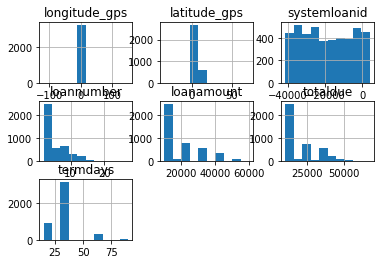

In [20]:
perf_demo_train.hist()

In [19]:
perf_demo_train.isnull().sum(axis=0)

customerid                       0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4343
employment_status_clients     1592
level_of_education_clients    3933
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3787
good_bad_flag                    0
dtype: int64

In [17]:
perf_demo_train.isnull().sum(axis=1)

0       2
1       1
2       3
3       3
4       2
       ..
4371    9
4372    3
4373    3
4374    2
4375    4
Length: 4376, dtype: int64

In [21]:
all_train= perf_demo_train.merge(avg_train, on='customerid', how='left')
all_test= perf_demo_test.merge(avg_test, on='customerid', how='left')

In [29]:
all_train.isnull().sum()

customerid                       0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4343
employment_status_clients     1592
level_of_education_clients    3933
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3787
good_bad_flag                    0
pay_rate                       139
dtype: int64

In [30]:
perf_train.isnull().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

In [42]:
#complain about the date formate
def age(df):
    val=[]
    for i in df :
        try:
            val.append(i.year)
        except:
            val.append(np.nan)
    return val

In [31]:
useless= ['customerid','systemloanid', 'approveddate', 'creationdate', 'bank_branch_clients']
all_train.drop(useless, axis=1, inplace=True)
all_test.drop(useless, axis=1, inplace=True)

In [44]:
all_train['birthdate']=age(pd.to_datetime(all_train['birthdate']) )
all_test['birthdate']=age(pd.to_datetime(all_test['birthdate']) )

In [47]:
all_train['referredby']=all_train['referredby'].fillna(0)
all_test['referredby']=all_test['referredby'].fillna(0)

In [94]:
from sklearn.preprocessing import OrdinalEncoder

In [96]:
all_test

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,loannumber,loanamount,totaldue,termdays,referredby,pay_rate
0,NaN,NaN,NaN,NaN,NaN,4,10000,12250.0,30,NaN,414.421216
1,NaN,NaN,NaN,NaN,NaN,10,40000,44000.0,30,NaN,1124.562543
2,Savings,3.227945,6.586668,UBA,Permanent,6,20000,24500.0,30,NaN,543.198572
3,NaN,NaN,NaN,NaN,NaN,8,30000,34500.0,30,NaN,1700.985919
4,Savings,5.248368,13.059864,UBA,Permanent,4,20000,24500.0,30,NaN,613.809524
...,...,...,...,...,...,...,...,...,...,...,...
1445,NaN,NaN,NaN,NaN,NaN,3,10000,11500.0,15,NaN,1263.736264
1446,NaN,NaN,NaN,NaN,NaN,3,10000,13000.0,30,NaN,862.500000
1447,NaN,NaN,NaN,NaN,NaN,9,40000,48000.0,60,NaN,652.856038
1448,NaN,NaN,NaN,NaN,NaN,14,60000,68100.0,90,NaN,2307.803973


In [95]:
all_train['bank_account_type']=OrdinalEncoder(categories=[['Savings', 'Current', 'Other']]).fit_transform(all_train['bank_account_type'].values.reshape(-1, 1))

all_test['bank_account_type']=OrdinalEncoder(categories=[['Savings', 'Current', 'Other']]).fit_transform(all_test['bank_account_type'].values.reshape(-1, 1))

ValueError: Found unknown categories [nan] in column 0 during fit

In [21]:
all_train['referredby']= np.nan_to_num(OrdinalEncoder().fit_transform(all_train['referredby'].values.reshape(-1, 1)) )

all_test['referredby']= np.nan_to_num(OrdinalEncoder().fit_transform(all_test['referredby'].values.reshape(-1, 1)) )

In [22]:
import seaborn as sns

<AxesSubplot:>

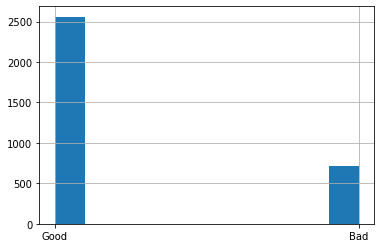

In [23]:
all_train['good_bad_flag'].hist()

In [24]:
import fillnull as fn

In [25]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [26]:
fn.get_null_percent(pd.concat([all_train.drop(['good_bad_flag'], axis=1), all_test], axis=0))

,percent,data type
employment_status_clients,14.934354,object
pay_rate,3.008753,float64


In [27]:
df= pd.concat([all_train.drop(['good_bad_flag'], axis=1), all_test], ignore_index=True, axis=0)
df['pay_rate'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [28]:
df.isnull().sum()

bank_account_type              0
longitude_gps                  0
latitude_gps                   0
bank_name_clients              0
employment_status_clients    546
loannumber                     0
loanamount                     0
totaldue                       0
termdays                       0
referredby                     0
pay_rate                       0
dtype: int64

In [29]:
fn.fill(df, AdaBoostRegressor(), AdaBoostClassifier())
fn.fill(df, AdaBoostRegressor(), AdaBoostClassifier())

filling employment_status_clients...


,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,loannumber,loanamount,totaldue,termdays,referredby,pay_rate,internal_id
0,0.0,487.0,1207.0,6.0,1.0,0.0,0.0,9.0,1.0,8.0,991.0,0.0
1,0.0,535.0,2346.0,12.0,1.0,0.0,0.0,9.0,1.0,0.0,145.0,1.0
2,0.0,2472.0,314.0,4.0,1.0,2.0,0.0,9.0,1.0,0.0,809.0,2.0
3,0.0,938.0,1919.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,71.0,3.0
4,0.0,975.0,1409.0,0.0,1.0,4.0,2.0,24.0,1.0,0.0,759.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,2383.0,2805.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,203.0,3651.0
3652,0.0,2387.0,260.0,4.0,1.0,1.0,0.0,9.0,1.0,0.0,446.0,3652.0
3653,0.0,771.0,1609.0,2.0,1.0,0.0,0.0,9.0,1.0,0.0,1111.0,3653.0
3654,0.0,1875.0,2567.0,13.0,1.0,3.0,2.0,24.0,1.0,0.0,631.0,3654.0


In [30]:
df.drop(['internal_id'], axis=1, inplace=True)
df

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,loannumber,loanamount,totaldue,termdays,referredby,pay_rate
0,0.0,487.0,1207.0,6.0,1.0,0.0,0.0,9.0,1.0,8.0,991.0
1,0.0,535.0,2346.0,12.0,1.0,0.0,0.0,9.0,1.0,0.0,145.0
2,0.0,2472.0,314.0,4.0,1.0,2.0,0.0,9.0,1.0,0.0,809.0
3,0.0,938.0,1919.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,71.0
4,0.0,975.0,1409.0,0.0,1.0,4.0,2.0,24.0,1.0,0.0,759.0
...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,2383.0,2805.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,203.0
3652,0.0,2387.0,260.0,4.0,1.0,1.0,0.0,9.0,1.0,0.0,446.0
3653,0.0,771.0,1609.0,2.0,1.0,0.0,0.0,9.0,1.0,0.0,1111.0
3654,0.0,1875.0,2567.0,13.0,1.0,3.0,2.0,24.0,1.0,0.0,631.0


In [33]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [38]:
all_train['good_bad_flag']= LabelEncoder().fit_transform(all_train['good_bad_flag']) 
Y=all_train['good_bad_flag']
m=Y.shape[0]

In [51]:
polyfeat=PolynomialFeatures(degree=3,interaction_only=True, include_bias=False).fit_transform(df)
cols=[str(i) for i in range(polyfeat.shape[1])]
polydf=pd.DataFrame(polyfeat, columns=cols)
tog=pd.concat([polydf.iloc[:m,:], all_train['good_bad_flag']], axis=1)
cor=list(tog.corr()[tog.corr()['good_bad_flag'].abs() >=0.01].index)
print(tog.corr()[tog.corr()['good_bad_flag'].abs() >=0.01]['good_bad_flag'])
cor.remove('good_bad_flag')
feat_train_test= pd.concat([df.reset_index(drop=True), polydf[cor].reset_index(drop=True)], axis=1, ignore_index=True)
feat_train_test

0                0.104677
1               -0.035587
2               -0.035051
4                0.016734
5                0.091889
                   ...   
227             -0.012408
228              0.081066
229              0.021724
230              0.027568
good_bad_flag    1.000000
Name: good_bad_flag, Length: 204, dtype: float64


,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
0,0.0,487.0,1207.0,6.0,1.0,0.0,0.0,9.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72.0,8919.0,71352.0,7928.0
1,0.0,535.0,2346.0,12.0,1.0,0.0,0.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1305.0,0.0,0.0
2,0.0,2472.0,314.0,4.0,1.0,2.0,0.0,9.0,1.0,0.0,...,1618.0,0.0,0.0,0.0,0.0,0.0,0.0,7281.0,0.0,0.0
3,0.0,938.0,1919.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,975.0,1409.0,0.0,1.0,4.0,2.0,24.0,1.0,0.0,...,3036.0,0.0,48.0,36432.0,1518.0,0.0,0.0,18216.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,2383.0,2805.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3652,0.0,2387.0,260.0,4.0,1.0,1.0,0.0,9.0,1.0,0.0,...,446.0,0.0,0.0,0.0,0.0,0.0,0.0,4014.0,0.0,0.0
3653,0.0,771.0,1609.0,2.0,1.0,0.0,0.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9999.0,0.0,0.0
3654,0.0,1875.0,2567.0,13.0,1.0,3.0,2.0,24.0,1.0,0.0,...,1893.0,0.0,48.0,30288.0,1262.0,0.0,0.0,15144.0,0.0,0.0


In [40]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedShuffleSplit, cross_val_score
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [56]:
Y= all_train['good_bad_flag']
X=df.iloc[:Y.shape[0], :]

In [57]:
def crs_val(algo):
  # run block of code and catch warnings
  import warnings
  with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    cv= StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3)
    model= Pipeline(steps=[('scale', StandardScaler()), ('model', algo)])
    result= cross_validate(model, X, Y, cv=cv, scoring='accuracy', return_train_score=False)
    #print(result)
    return 1-result['test_score']

In [58]:
1- 0.2179226069246436

0.7820773930753564

In [59]:
algos= {'LogisticRegression':LogisticRegression(max_iter=2000),
       'XGBClassifier': RandomForestClassifier(),
       'LGBMClassifier': LGBMClassifier(random_state=0),
       'ExtraTreesClassifier': ExtraTreesClassifier()
       }
for alg in algos.keys():
    score= crs_val(algos[alg])
    print(alg+': \n',score.mean(), ' +/- ',score.std())

LogisticRegression: 
 0.2179226069246436  +/-  0.0
XGBClassifier: 
 0.2235234215885947  +/-  0.008034487697586312
LGBMClassifier: 
 0.2294297352342159  +/-  0.008581204830053863
ExtraTreesClassifier: 
 0.23665987780040734  +/-  0.00879780491505303


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#param_grid = {"n_estimators": [200, 300, 400], "max_depth": [20,30,40] }
#model_to_tune = RandomForestClassifier(n_jobs=-1, random_state=0)

param_grid = {"C": [0.1, 1, 10], "penalty": ['l1', 'l2'] }
model_to_tune = LogisticRegression(n_jobs= -1)

cv= StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3)

search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, cv=cv, scoring='accuracy',
                      n_jobs=-1)
search.fit( X, Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [81]:
demo_test

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN
...,...,...,...,...,...,...,...,...,...
1482,8a858fc25bafabdc015bb47fda0323e5,1976-04-13 00:00:00.000000,Savings,3.481190,6.442728,GT Bank,NaN,Permanent,NaN
1483,8a858e245c214660015c3397e4db389a,1990-10-24 00:00:00.000000,Savings,4.738209,8.179723,GT Bank,NaN,Permanent,NaN
1484,8a858e8b5bc9e7e6015bcd7374077f0c,1988-06-12 00:00:00.000000,Savings,3.424825,6.455802,First Bank,NaN,Permanent,NaN
1485,8a858f2e5c699f3a015c77aa22ed7f23,1974-03-23 00:00:00.000000,Savings,3.318851,7.113212,FCMB,NaN,Permanent,NaN


In [80]:
perf_demo_test

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN,301992953,2,36:45.0,36:38.0,10000,11500.0,15,NaN
1,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN,301997095,14,31:11.0,30:01.0,40000,44000.0,30,NaN
2,8a858e695775665c015779a1a5cc1192,1988-11-19 00:00:00.000000,Other,3.307558,7.112214,Access Bank,NaN,Self-Employed,Post-Graduate,301989636,8,31:21.0,31:13.0,20000,24500.0,30,NaN
3,8a858fcf5b39c3ba015b3d9f215c3922,1978-06-11 00:00:00.000000,Savings,3.892932,7.408140,GT Bank,NaN,NaN,NaN,301990516,3,24:21.0,24:08.0,10000,11500.0,15,NaN
4,8a858edc5ceea2e6015ceea77c5c0300,1987-10-20 00:00:00.000000,Savings,8.339893,5.028449,Diamond Bank,NaN,Permanent,NaN,301981455,2,52:27.0,52:19.0,10000,13000.0,30,8a858fe45cd62cbf015cdfb7b59f05f4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,8a858e675c3fe0a1015c44ba8a037fee,1994-04-26 00:00:00.000000,Savings,5.288827,7.604053,GT Bank,NaN,Permanent,NaN,301987980,2,14:28.0,14:20.0,10000,11500.0,15,NaN
381,8a858fda5c1bd1f7015c1be7f7450f37,1990-11-24 00:00:00.000000,Savings,5.313058,5.412953,Fidelity Bank,NaN,Permanent,NaN,301972650,3,28:11.0,28:03.0,10000,13000.0,30,NaN
382,8a858f0c5ca18b3d015ca194f4a60867,1988-04-01 00:00:00.000000,Savings,3.349666,6.600069,EcoBank,NaN,Permanent,NaN,301960859,2,18:51.0,18:45.0,10000,13000.0,30,NaN
383,8a858e675b00c831015b06776ce75e69,1975-04-07 00:00:00.000000,Savings,3.876507,7.367196,UBA,NaN,Permanent,NaN,301996981,5,27:00.0,26:55.0,20000,24500.0,30,NaN


In [83]:
df

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,loannumber,loanamount,totaldue,termdays,referredby,pay_rate
0,0.0,487.0,1207.0,6.0,1.0,0.0,0.0,9.0,1.0,8.0,991.0
1,0.0,535.0,2346.0,12.0,1.0,0.0,0.0,9.0,1.0,0.0,145.0
2,0.0,2472.0,314.0,4.0,1.0,2.0,0.0,9.0,1.0,0.0,809.0
3,0.0,938.0,1919.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,71.0
4,0.0,975.0,1409.0,0.0,1.0,4.0,2.0,24.0,1.0,0.0,759.0
...,...,...,...,...,...,...,...,...,...,...,...
3651,0.0,2383.0,2805.0,6.0,1.0,0.0,0.0,6.0,0.0,0.0,203.0
3652,0.0,2387.0,260.0,4.0,1.0,1.0,0.0,9.0,1.0,0.0,446.0
3653,0.0,771.0,1609.0,2.0,1.0,0.0,0.0,9.0,1.0,0.0,1111.0
3654,0.0,1875.0,2567.0,13.0,1.0,3.0,2.0,24.0,1.0,0.0,631.0


In [82]:
perf_test

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN
...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15,NaN
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30,NaN
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60,NaN
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90,NaN


In [74]:
sub= pd.read_csv('SampleSubmission.csv')
sub

,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1
...,...,...
1445,8a858fff5a36fe68015a3744f0021e89,1
1446,8aaae7a74400b28201441c8b62514150,1
1447,8aab10f748cf78ff0148d11fac1447a6,1
1448,8aab160f499477da014999ba2f0f578b,1


In [64]:
def submit():
    pred= search.predict(df.iloc[m:,:])
    pred
    import datetime
    sub= pd.read_csv('SampleSubmission.csv')
    sub['good_bad_flag']=pred
    moment=datetime.datetime.now().strftime('%m%d%H%M%S')
    #print(moment)
    sub.to_csv(moment+'.csv', index=False)
    print(moment)
submit()

ValueError: Length of values (384) does not match length of index (1450)

In [208]:
#param_grid = {"C": [0.1, 1, 10], "penalty": ['l1', 'l2'] }
#model_to_tune = LogisticRegression(n_jobs= -1)

# Declare the inner and outer cross-validation
inner_cv = StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.3)
outer_cv = StratifiedShuffleSplit(n_splits=3, random_state=0, test_size=0.3)

# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model_to_tune, param_grid=param_grid, cv=inner_cv, n_jobs=-1)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X, Y, cv=outer_cv, n_jobs=-1)
print(f"The mean score using nested cross-validation is: "
      f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The mean score using nested cross-validation is: 0.779 +/- 0.005


In [213]:
#param_grid = {"C": [0.1, 1, 10], "penalty": ['l1', 'l2'] }
#model_to_tune = LogisticRegression(n_jobs= -1)

test_score_not_nested = []
test_score_nested = []

N_TRIALS = 20
for i in range(N_TRIALS):
    inner_cv = StratifiedShuffleSplit(n_splits=5, random_state=i*3, test_size=0.3)
    outer_cv = StratifiedShuffleSplit(n_splits=5, random_state=i*3, test_size=0.3)

    # Non_nested parameter search and scoring
    model = GridSearchCV(estimator=model_to_tune, param_grid=param_grid,
                         cv=inner_cv, n_jobs=-1)
    model.fit(X, Y)
    test_score_not_nested.append(model.best_score_)

    # Nested CV with parameter optimization
    test_score = cross_val_score(model, X, Y, cv=outer_cv, n_jobs=-1)
    test_score_nested.append(test_score.mean())

In [214]:
all_scores = {
    "Not nested CV": test_score_not_nested,
    "Nested CV": test_score_nested,
}
all_scores = pd.DataFrame(all_scores)

In [215]:
all_scores

,Not nested CV,Nested CV
0,0.782077,0.782077
1,0.782077,0.782077
2,0.782077,0.782077
3,0.782077,0.782077
4,0.782077,0.782077
5,0.782077,0.782077
6,0.781670,0.781670
7,0.782077,0.782077
8,0.782077,0.782077
9,0.782077,0.782077


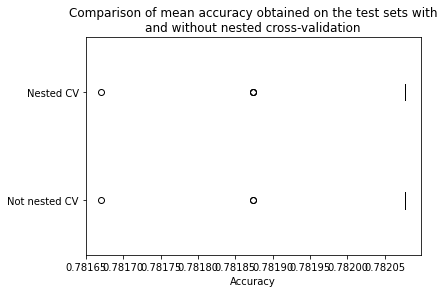

In [216]:


import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
all_scores.plot.box(color=color, vert=False)
plt.xlabel("Accuracy")
_ = plt.title("Comparison of mean accuracy obtained on the test sets with\n"
              "and without nested cross-validation")

